In [1]:
import pandas as pd

# Load the Excel file
file_path = '2023pitching.xlsx'
excel_data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
sheet_names = excel_data.sheet_names
sheet_names


['Sheet1']

In [3]:
# Load data from the sheet
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Display the first few rows of the dataframe
data.head()


,Team,Wins,ERA,H,R,HR,BB,SO,WHIP,AVG
0,Atlanta Braves,104,4.14,1341,716,187,534,1516,1.30,0.245
1,Baltimore Orioles,101,3.89,1334,678,177,473,1431,1.24,0.242
2,Los Angeles Dodgers,100,4.06,1284,699,200,454,1388,1.20,0.236
3,Tampa Bay Rays,99,3.86,1258,665,177,439,1507,1.18,0.231
4,Milwaukee Brewers,92,3.71,1218,647,198,493,1425,1.19,0.226


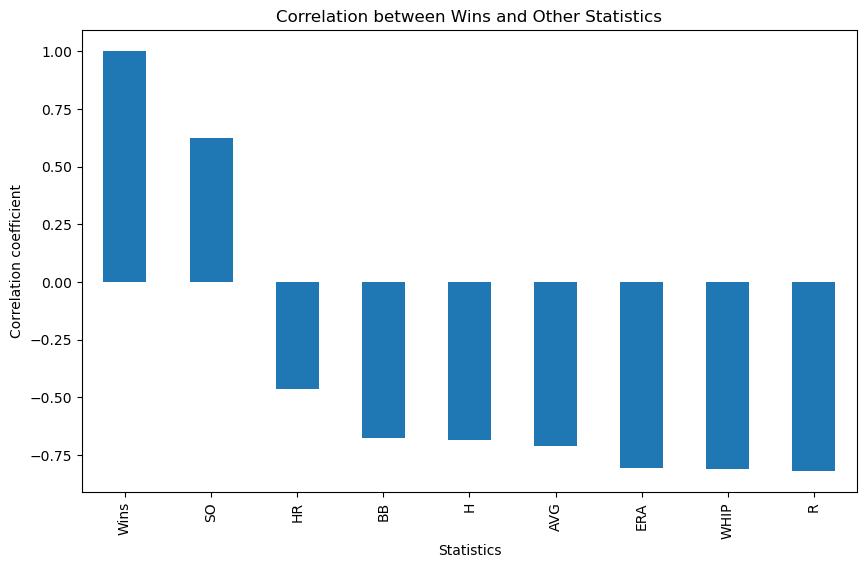

Wins    1.000000
SO      0.623082
HR     -0.462065
BB     -0.675122
H      -0.682906
AVG    -0.708469
ERA    -0.806821
WHIP   -0.811434
R      -0.819148
Name: Wins, dtype: float64

In [5]:
import matplotlib.pyplot as plt

# Select relevant columns
stats = data[['Wins', 'ERA', 'H', 'R', 'HR', 'BB', 'SO', 'WHIP', 'AVG']]

# Calculate correlations
correlations = stats.corr()['Wins'].sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation between Wins and Other Statistics')
plt.ylabel('Correlation coefficient')
plt.xlabel('Statistics')
plt.show()

# Display correlations sorted
correlations


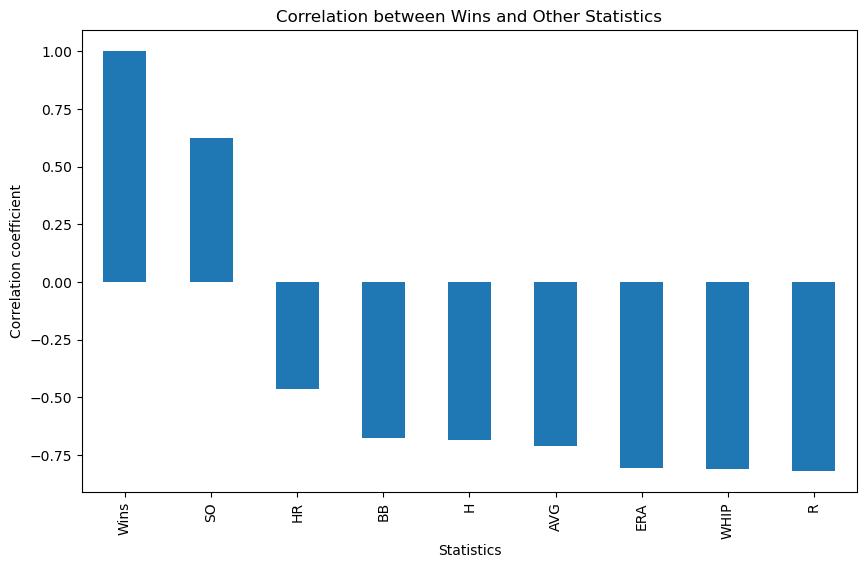

Wins    1.000000
SO      0.623082
HR     -0.462065
BB     -0.675122
H      -0.682906
AVG    -0.708469
ERA    -0.806821
WHIP   -0.811434
R      -0.819148
Name: Wins, dtype: float64

In [7]:
import matplotlib.pyplot as plt

# Select relevant columns
stats = data[['Wins', 'ERA', 'H', 'R', 'HR', 'BB', 'SO', 'WHIP', 'AVG']]

# Calculate correlations
correlations = stats.corr()['Wins'].sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation between Wins and Other Statistics')
plt.ylabel('Correlation coefficient')
plt.xlabel('Statistics')
plt.show()

# Display correlations sorted
correlations


In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare to store the equations
equations = {}

# Perform linear regression for each statistic
for stat in stats.columns[1:]:
    X = stats[[stat]].values.reshape(-1, 1)  # Reshape data to fit the model
    y = stats['Wins'].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Get the slope (coefficient) and intercept
    slope = model.coef_[0]
    intercept = model.intercept_
    
    # Store the equation
    equations[stat] = f'Wins = {slope:.4f} * {stat} + {intercept:.4f}'

equations


{'ERA': 'Wins = -20.0289 * ERA + 167.7118',
 'H': 'Wins = -0.1045 * H + 223.2310',
 'R': 'Wins = -0.1309 * R + 178.8654',
 'HR': 'Wins = -0.3397 * HR + 147.4403',
 'BB': 'Wins = -0.1260 * BB + 147.4626',
 'SO': 'Wins = 0.0833 * SO + -35.1801',
 'WHIP': 'Wins = -103.9904 * WHIP + 217.9206',
 'AVG': 'Wins = -671.4794 * AVG + 247.6836'}

In [11]:
# Prepare the feature matrix and target vector
X = stats.drop(columns='Wins')
y = stats['Wins']

# Fit a multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Create the equation string
equation = f'Wins = {intercept:.4f}'
for coef, stat in zip(coefficients, X.columns):
    equation += f' + ({coef:.4f} * {stat})'

equation


'Wins = 68.6358 + (17.4315 * ERA) + (0.3634 * H) + (-0.1427 * R) + (0.0237 * HR) + (0.4462 * BB) + (0.0164 * SO) + (-698.9669 * WHIP) + (831.6931 * AVG)'